# Николаев Евгений Алексекевич, группа 22.М08

## Задание №5

Преобразованияв частотной области. (Изд. 2)
- См. примеры 4.2 и 4.3. На 2-3 изображениях проанализировать взаимосвязь пространственного и частотного представлений.
- См. рис. 4.6. Фильтр-пробка — на 2-3 изображениях показать и объяснить эффект данного фильтра.

In [6]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

## Отображение и обработка изображения

In [7]:
def Filtration(image, transformation_function, **kernel_size):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # считывание изображения
    filtered_img = transformation_function(img, **kernel_size)
    
    plt.figure(figsize=(20, 5), dpi=200)
    plt.subplot(141)
    plt.imshow(img, cmap='gray') 
    plt.title("Исходное") 
    plt.subplot(142)
    plt.imshow(filtered_img, cmap='gray') 
    plt.title("Фильтр") 
    
    # Преобразование изображения в оттенки серого, если оно не было предварительно выполнено
    if len(filtered_img.shape) == 3:
        filtered_img = np.mean(filtered_img, axis=2)

    # Выполнение двумерного дискретного преобразования Фурье
    filtered_fourier = np.fft.fft2(filtered_img)

    # Обнуление нулевого члена преобразования Фурье
    filtered_fourier[0, 0] = 0
    
    plt.subplot(143)
    plt.imshow(np.log(1 + np.abs(np.fft.fftshift(filtered_fourier))), cmap='gray') 
    plt.title("Спектр после обнуления DC компоненты")
    
    plt.show()

## Спектр Фурье

Спектр Фурье изображения представляет собой двумерный массив комплексных чисел, где каждый элемент представляет собой значение амплитуды и фазы в соответствующей частоте. Частоты в спектре Фурье изображения соответствуют различным пространственным частотам в изображении, где высокие частоты соответствуют быстро меняющимся деталям изображения, а низкие частоты - плавным переходам цвета и яркости.

Амплитудный спектр изображения Фурье - это модуль обычного спектра Фурье, который содержит только значения амплитуды в каждой частоте. Он также представляет собой двумерный массив, но содержит только действительные числа, которые показывают, насколько интенсивно присутствуют различные частоты в изображении.

Использование амплитудного спектра изображения Фурье является более распространенным, так как он содержит только информацию об амплитуде различных частот в изображении и позволяет лучше понять распределение энергии в изображении в частотной области. Обычный спектр Фурье используется реже, но может быть полезен в некоторых задачах, например, при анализе фазовой информации в изображениях с периодической структурой.

In [9]:
def amplitude_spectrum(image, kernel_size=5, min_value=0, max_value=255):
    # Выполнение преобразования Фурье
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Получение амплитудного спектра
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    # Масштабирование в диапазон [min_value, max_value]
    magnitude_spectrum = (magnitude_spectrum - np.min(magnitude_spectrum)) / (np.max(magnitude_spectrum) - np.min(magnitude_spectrum))
    magnitude_spectrum *= (max_value - min_value)
    magnitude_spectrum += min_value
    
    return magnitude_spectrum

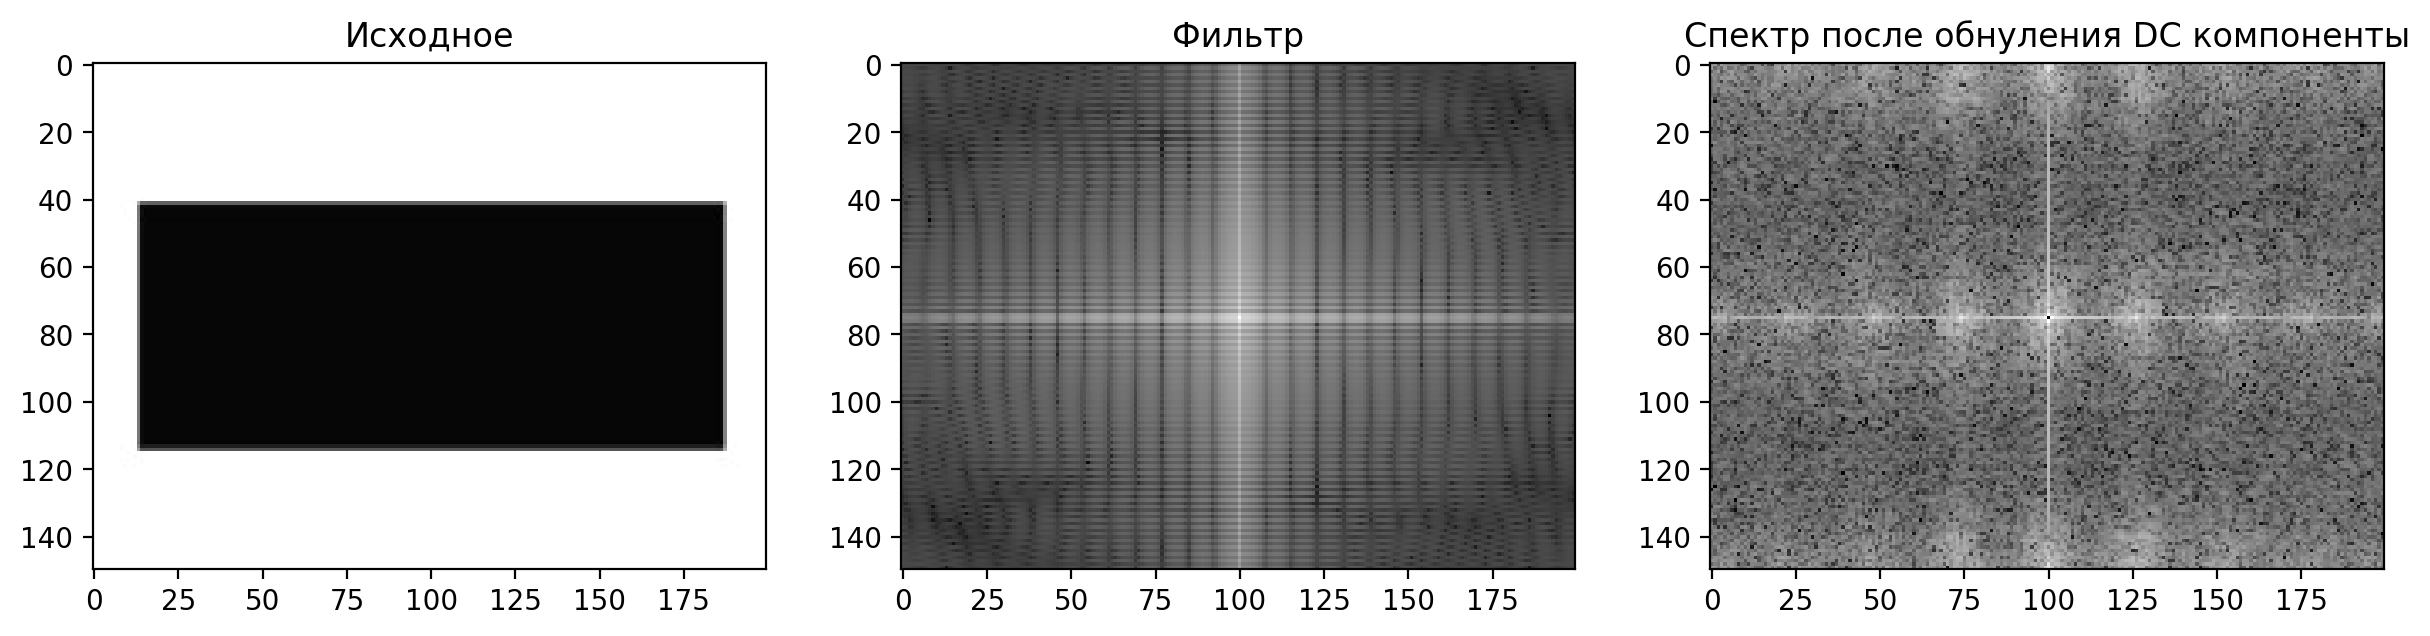

In [18]:
Filtration('imt1.jpg', amplitude_spectrum)

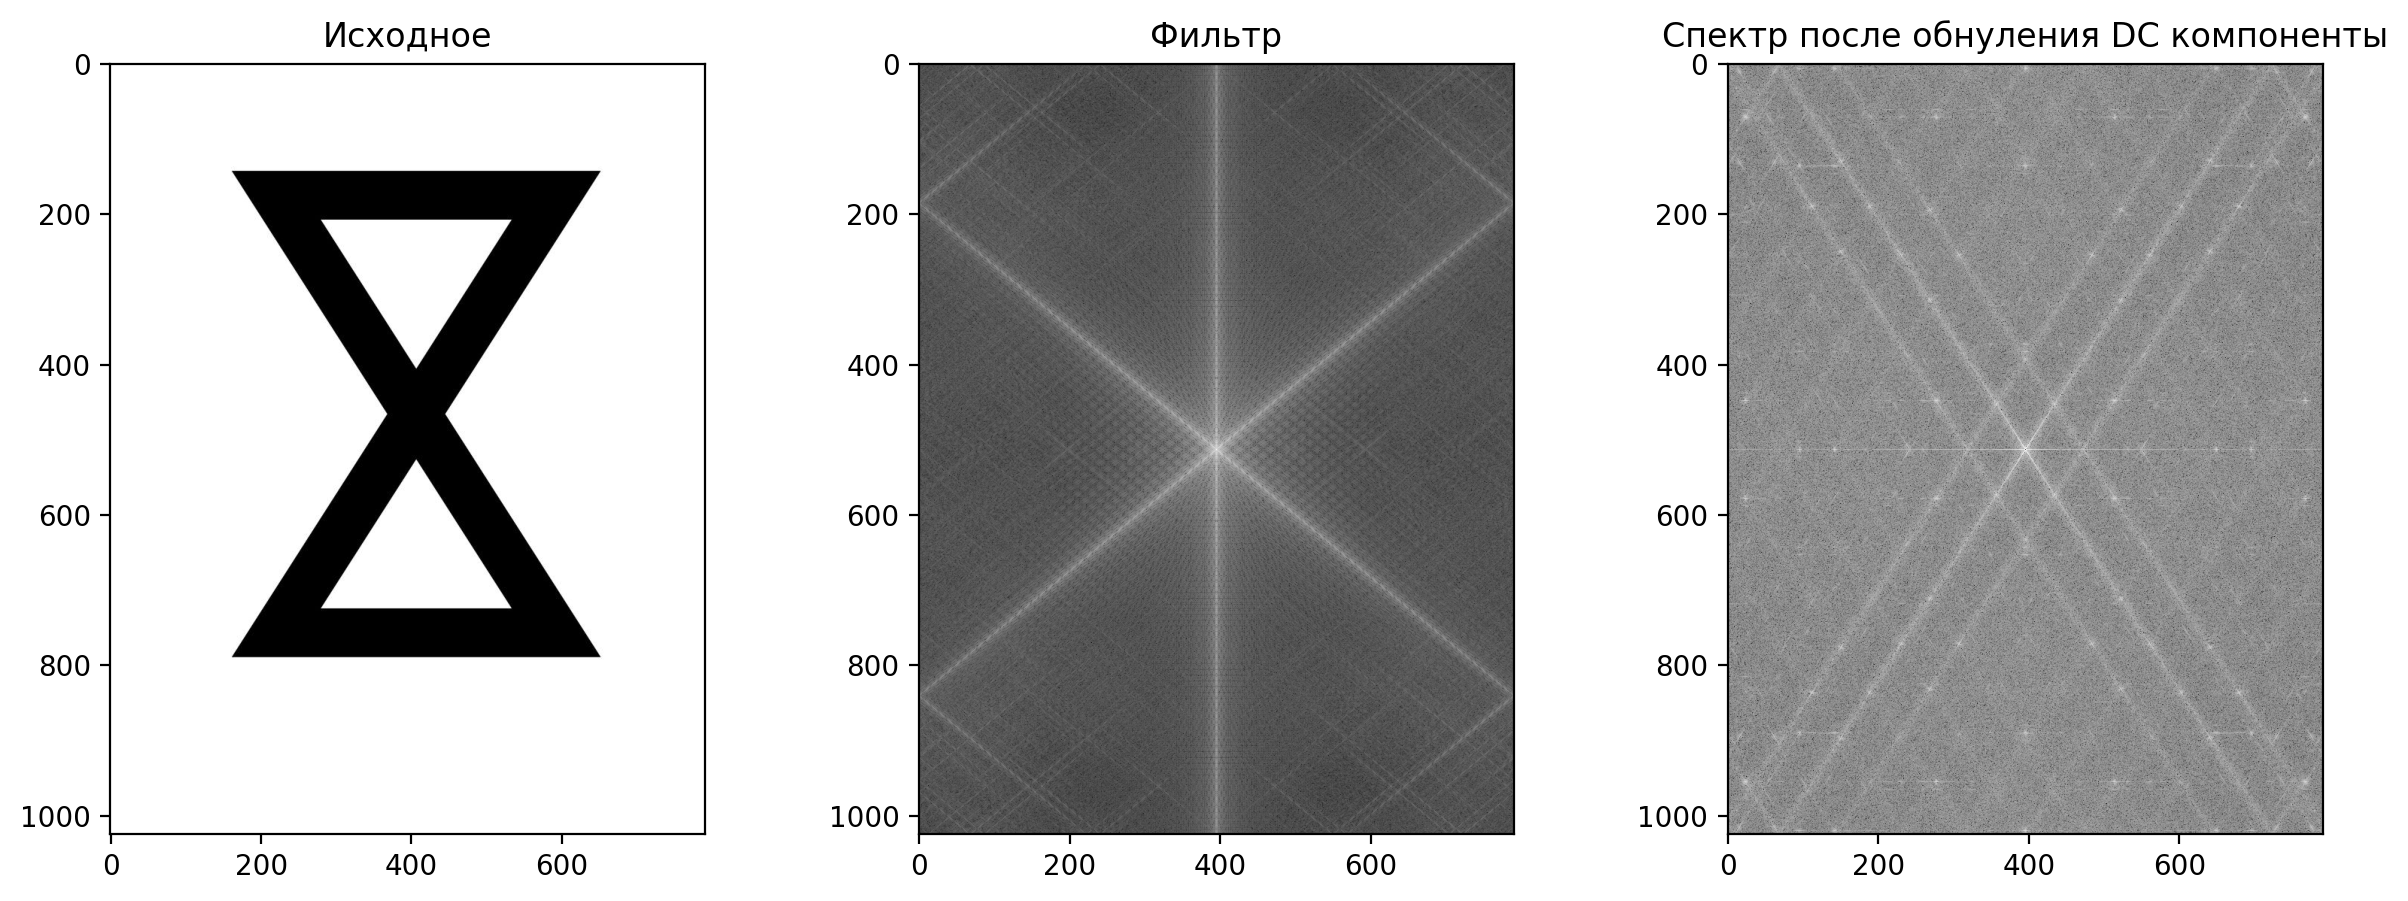

In [43]:
Filtration('op1.jpg', amplitude_spectrum)

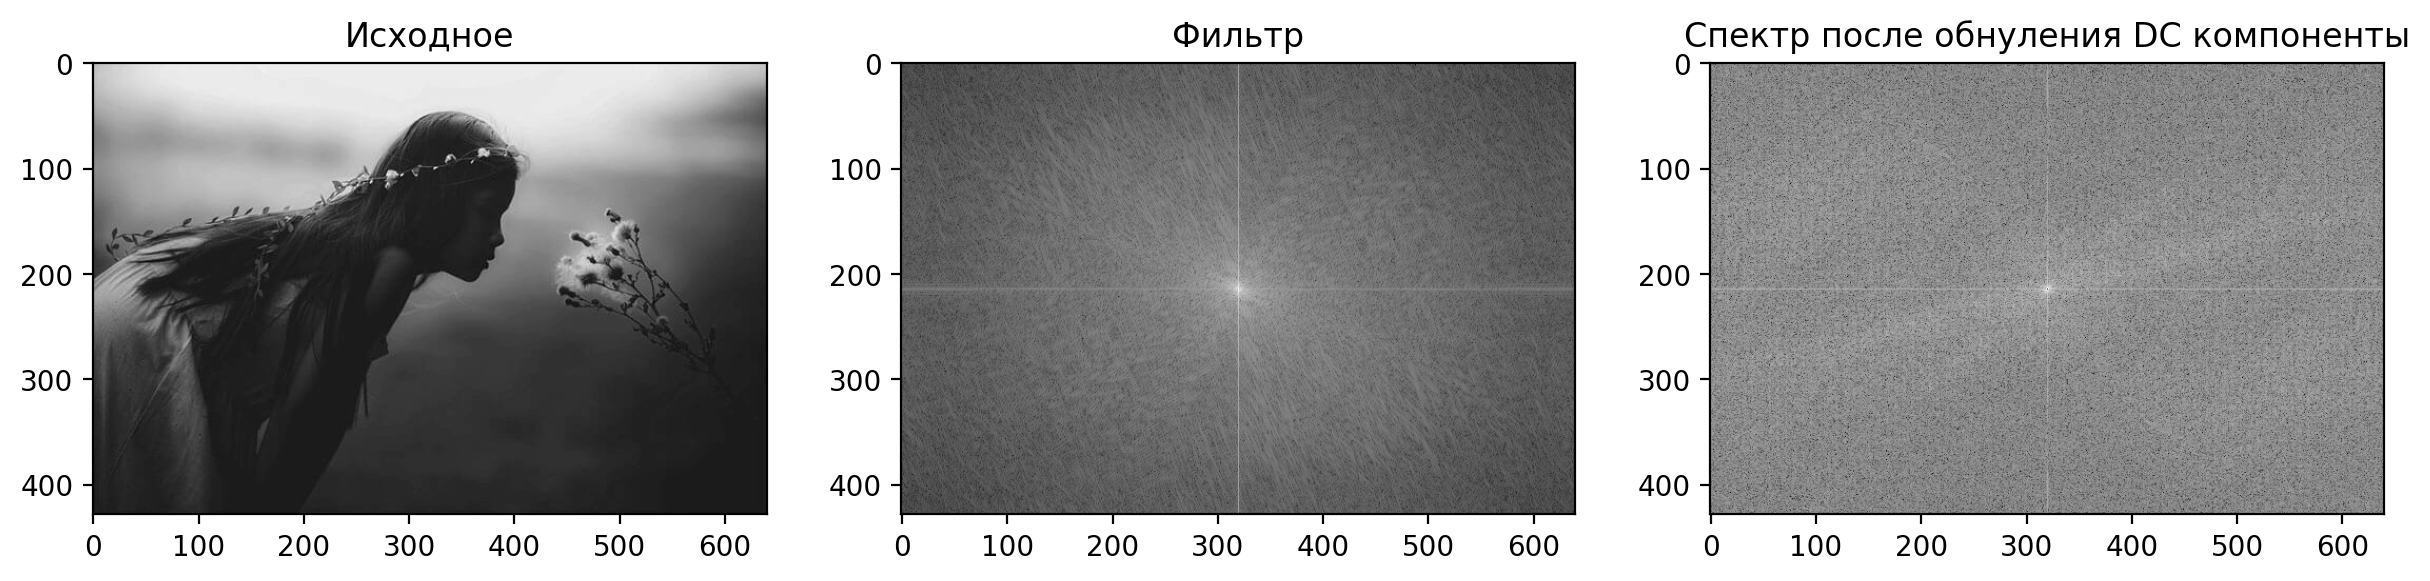

In [42]:
Filtration('imgg7.jpg', amplitude_spectrum)

Размытие изображения приводит к сглаживанию резких границ и деталей, из-за чего преобладающими становятся низкие частоты. Это связано с тем, что высокочастотные компоненты, отвечающие за резкие контуры и детали, снижаются или подавляются, тогда как низкочастотные компоненты сохраняют свою преобладающую роль.

В случае высококонтрастного изображения, которое содержит резкие границы, текстуры и детали, высокочастотные компоненты, отвечающие за эти характеристики, имеют более высокие амплитуды и преобладают в спектре изображения. Таким образом, на высококонтрастном изображении преобладают высокие частоты.

Однако стоит отметить, что преобладающиечастоты на размытом или высококонтрастном изображении могут изменяться в зависимости от конкретного изображения и методов обработки, примененных к нему. Анализ спектра Фурье поможет определить вклад различных частотных компонент в изображение и их относительную силу в спектре, что может быть полезным при выборе метода обработки изображения.

DC компонента - это компонента нулевой частоты в спектре Фурье сигнала. Эта компонента представляет собой постоянную составляющую сигнала, то есть среднее значение сигнала, вычисленное по всему периоду. DC компонента показывает, насколько ярким или темным является средний уровень яркости изображения или звука.

* DC компонента определяет яркость изображения. Если DC компонента высокая (близкое к максимально возможному значению яркости пикселей), то изображение будет ярким, а если она низкая, то изображение будет темным. В аудиосигналах, DC компонента определяет уровень сигнала и соответствует постоянному фоновому шуму или уровню шума в отсутствие сигнала

## Фильтр - пробка

Фильтр-пробка для изображений является типом фильтра, который используется для подавления определенных частотных компонент в изображении. Фильтр-пробка является комбинацией фильтра верхних и нижних частот, которые подавляют сигнал в заданной полосе частот, называемой частотой пробки. Частота пробки является центральной частотой этой полосы и обычно настраивается на частоту, которую необходимо подавить.

Частота пробки - это частота, на которой выполняется подавление или снижение амплитуды сигнала с помощью фильтра-пробки

Если применить фильтр-пробку к изображению, то произойдет подавление или снижение амплитуды определенных частотных компонент в изображении. Это может привести к различным эффектам в зависимости от настроек фильтра и характера изображения.

Например, если на изображении присутствует шум или помехи на определенных частотах, то применение фильтра-пробки может привести к удалению этих помех из изображения. Однако при этом могут также быть подавлены и другие частотные компоненты, что может привести к потере деталей или размытию изображения.


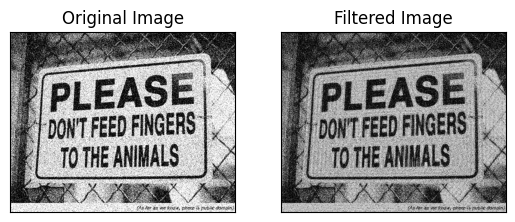

In [63]:
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
img = cv2.imread('iio.png', 0)

# Применение фильтра-пробки к изображению
img_filtered = notch_filter(img, 60, 10)

# Отображение исходного и обработанного изображений
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

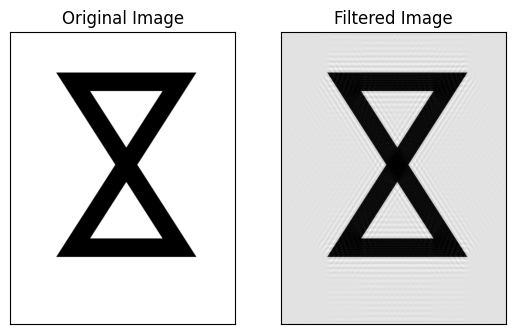

In [64]:
img = cv2.imread('op1.jpg', 0)

# Применение фильтра-пробки к изображению
img_filtered = notch_filter(img, 60, 10)

# Отображение исходного и обработанного изображений
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

Если после применения фильтра-пробки к изображению оно стало темнее, то это может быть связано с тем, что фильтр-пробка удаляет некоторые частоты изображения, в том числе и высокие частоты, которые могут содержать детали и текстуры изображения. Кроме того, при использовании фильтра-пробки может происходить подавление некоторых частотных компонент, что может приводить к изменению контрастности и яркости изображения.